TASK: Is there a conflict of interest for a website that both sells movie tickets and displays review ratings as well?
      

More specifically: 

Does a website like Fandango artificially displa higher review ratings to sell more movie tickets?

Based on an article: http://fivethirtyeight.com/features/fandango-movies-ratings/

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
fandango = pd.read_csv('fandango_scrape.csv')

In [41]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [42]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [43]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Creating a scatterplot ratings against votes

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

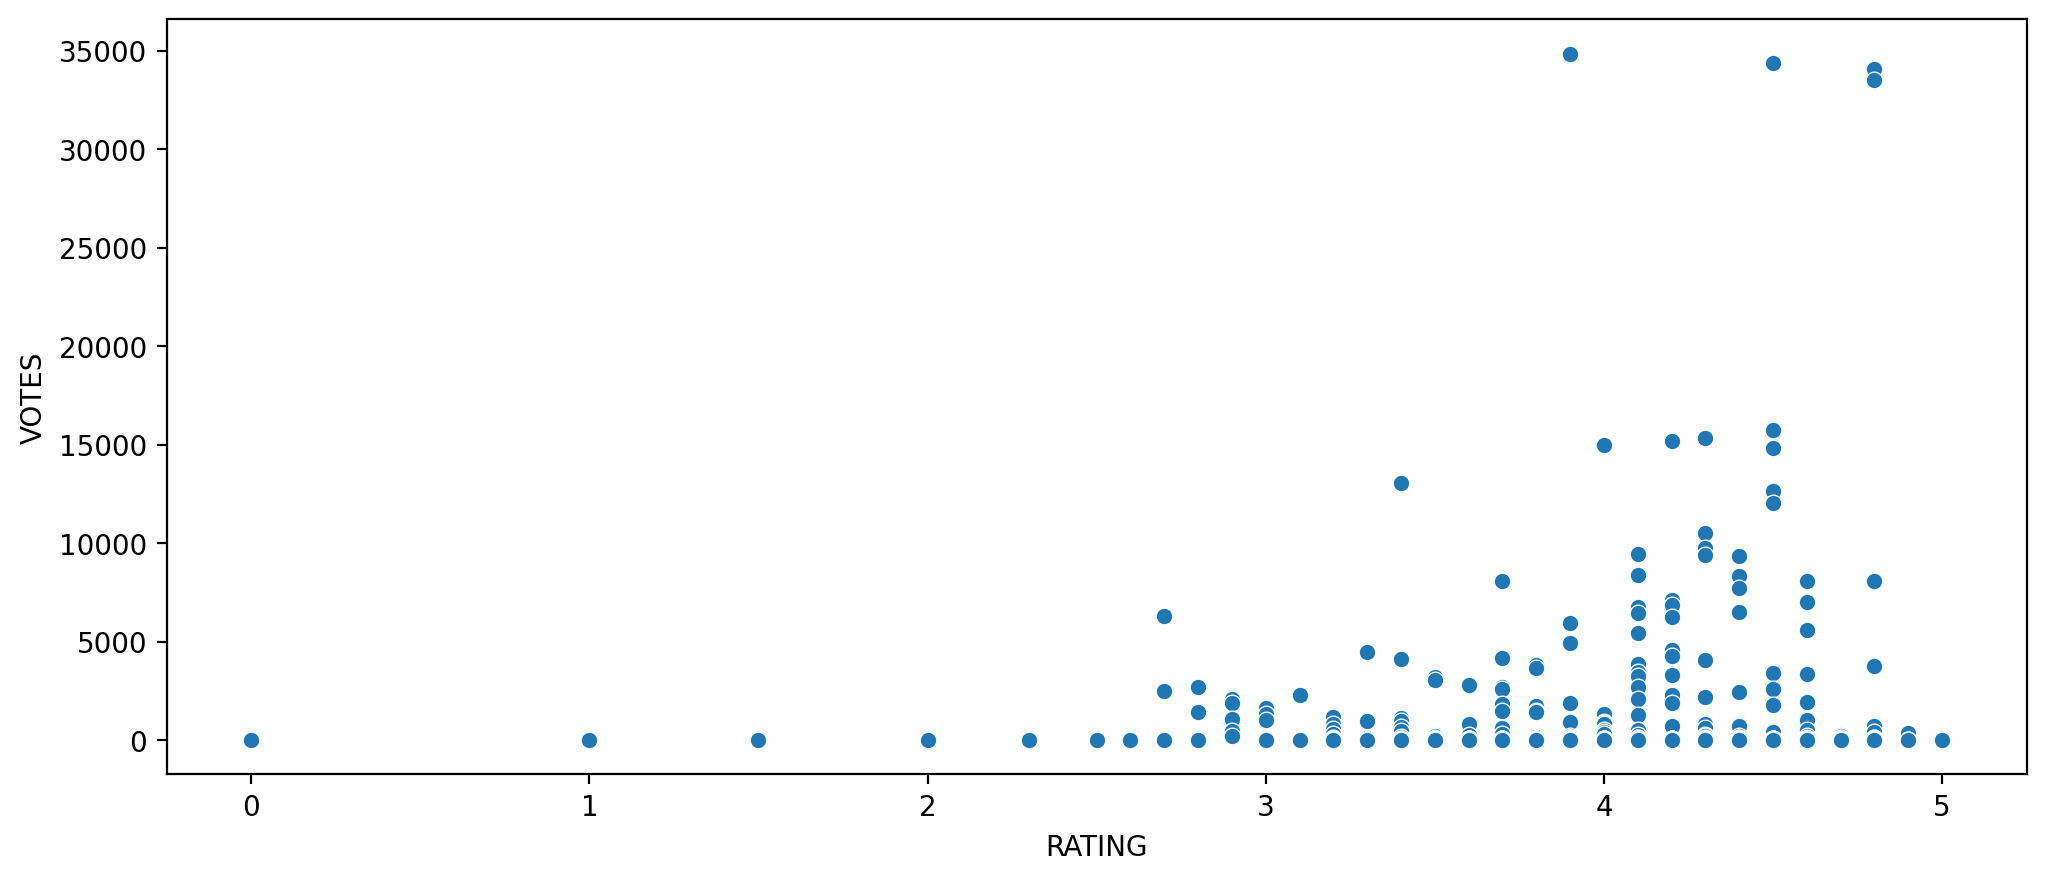

In [44]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x = 'RATING', y = 'VOTES', data = fandango)

In [45]:
fandango.corr() #finding correlation

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Create a new column named YEAR by stripping (year) from FILM column

In [46]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1]).replace(')', '')

In [47]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


In [48]:
fandango['YEAR'].value_counts() #Movies released per year

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

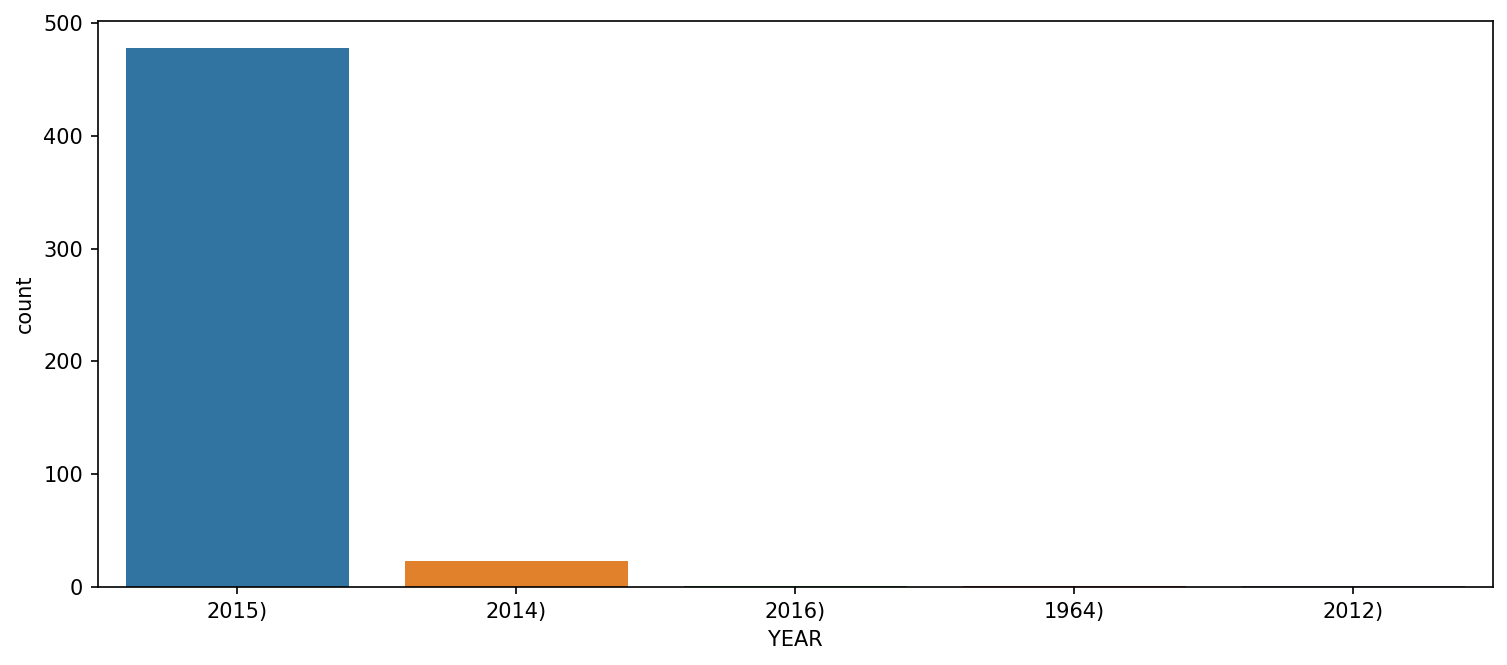

In [49]:
# Visualising plot based on count should always be countplot

plt.figure(figsize = (12,5), dpi = 150)
sns.countplot(data = fandango, x = 'YEAR')

What are the 10 movies with highest number of votes?

In [50]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


In [51]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


In [52]:
zero_votes = fandango['VOTES'] == 0

In [53]:
zero_votes.sum()

69

In [54]:
fandango_new = fandango[fandango['VOTES'] > 0]

In [55]:
fandango_new.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


In [56]:
fandango_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [57]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


Creating a KDE plot with actual RATINGS and STARS to show the difference

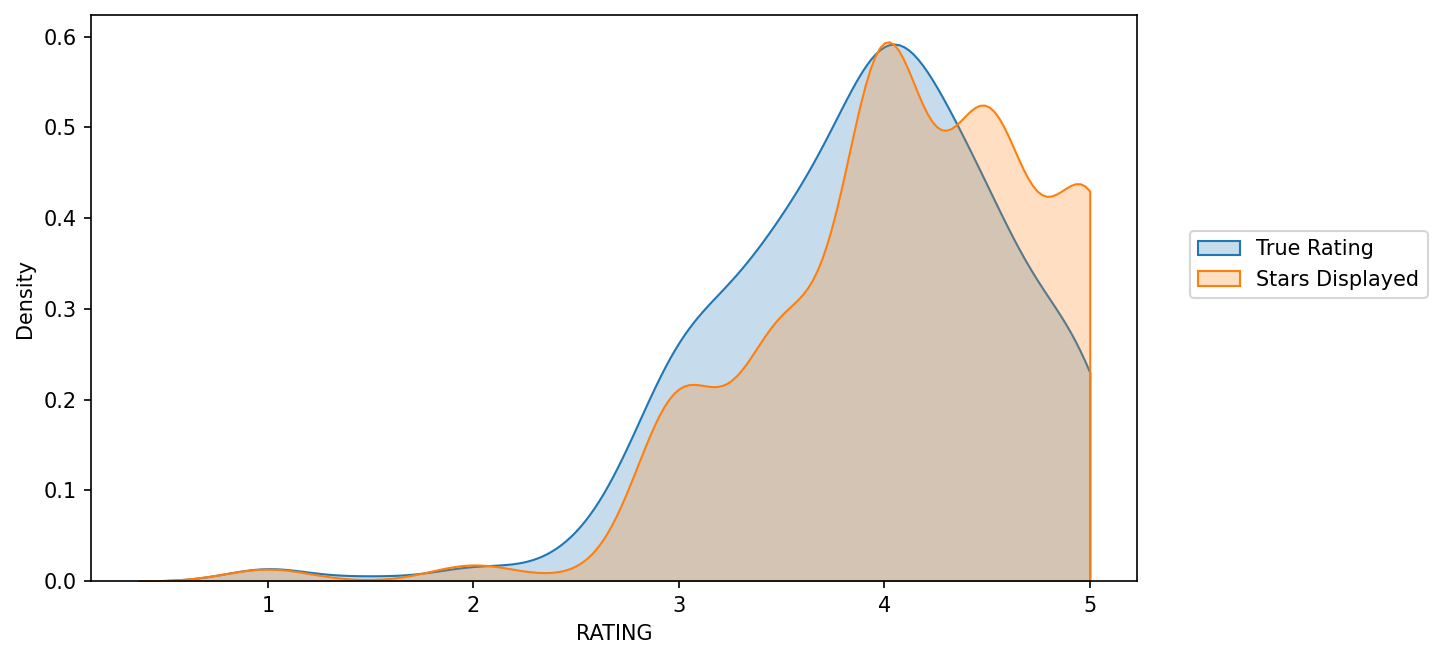

In [58]:
plt.figure(figsize = (9,5), dpi = 150)
sns.kdeplot(data = fandango_new, x = 'RATING', clip = [0,5], fill = True, label = 'True Rating')
sns.kdeplot(data = fandango_new, x = 'STARS', clip = [0,5], fill = True, label = 'Stars Displayed')

plt.legend(loc = (1.05,0.5))

In [59]:
fandango_new['STARS_DIFF'] = fandango_new['STARS'] - fandango_new['RATING']
fandango_new['STARS_DIFF'] = fandango_new['STARS_DIFF'].round(2)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_12756\3921348575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_new['STARS_DIFF'] = fandango_new['STARS'] - fandango_new['RATING']
C:\Users\Akshay\AppData\Local\Temp\ipykernel_12756\3921348575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_new['STARS_DIFF'] = fandango_new['STARS_DIFF'].round(2)


In [60]:
fandango_new

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

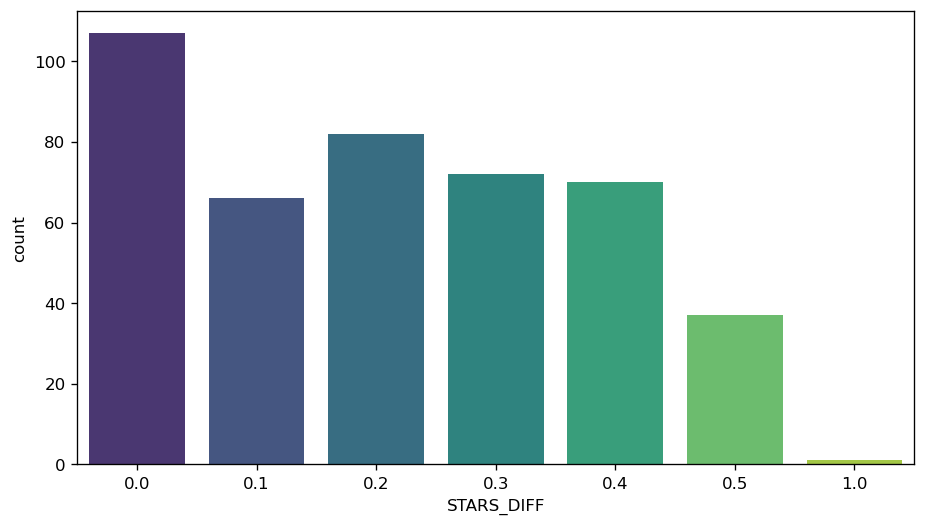

In [61]:
plt.figure(figsize = (9,5), dpi = 120)
sns.countplot(data = fandango_new, x = 'STARS_DIFF', palette = 'viridis')

In [62]:
fandango_new[fandango_new['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


# COMPARING WITH OTHER SITES NOW 


In [63]:
all_ratings = pd.read_csv('all_sites_scores.csv')

In [64]:
all_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [65]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [66]:
all_ratings.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

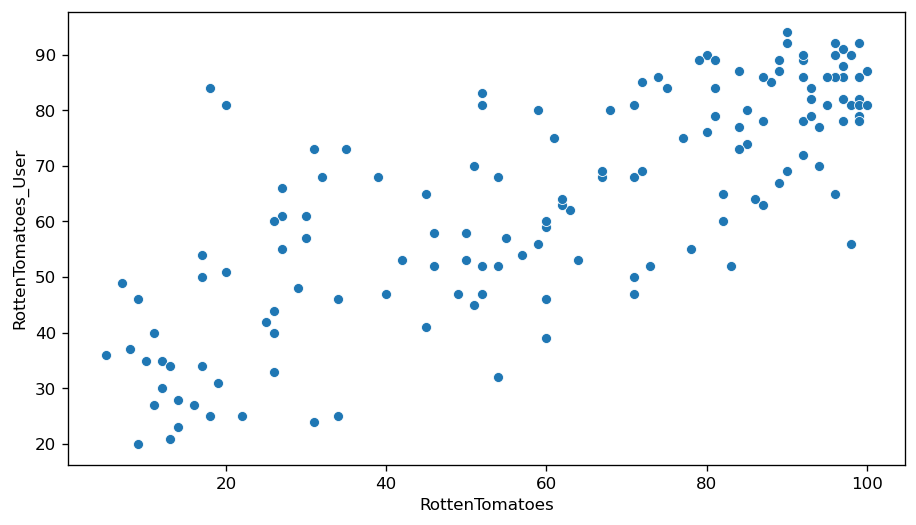

In [67]:
plt.figure(figsize = (9,5), dpi =120)
sns.scatterplot(data = all_ratings, x = 'RottenTomatoes', y = 'RottenTomatoes_User')


In [68]:
all_ratings['RottenTomatoes_Diff'] = all_ratings['RottenTomatoes'] - all_ratings['RottenTomatoes_User']

In [69]:
all_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [70]:
all_ratings['RottenTomatoes_Diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT Users Score')

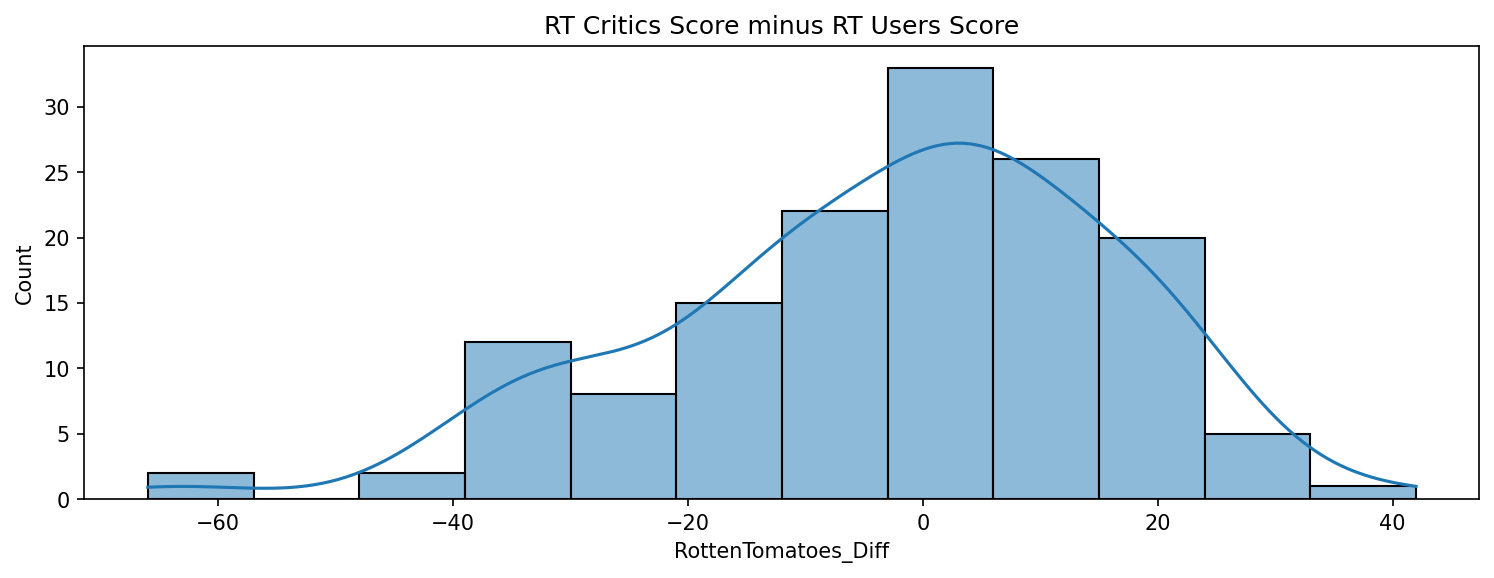

In [71]:
plt.figure(figsize = (12,4), dpi = 150)
sns.histplot(data=all_ratings, x = 'RottenTomatoes_Diff', kde = True)
plt.title('RT Critics Score minus RT Users Score')

Text(0.5, 1.0, 'Abs difference of RT Critics Score minus RT Users Score')

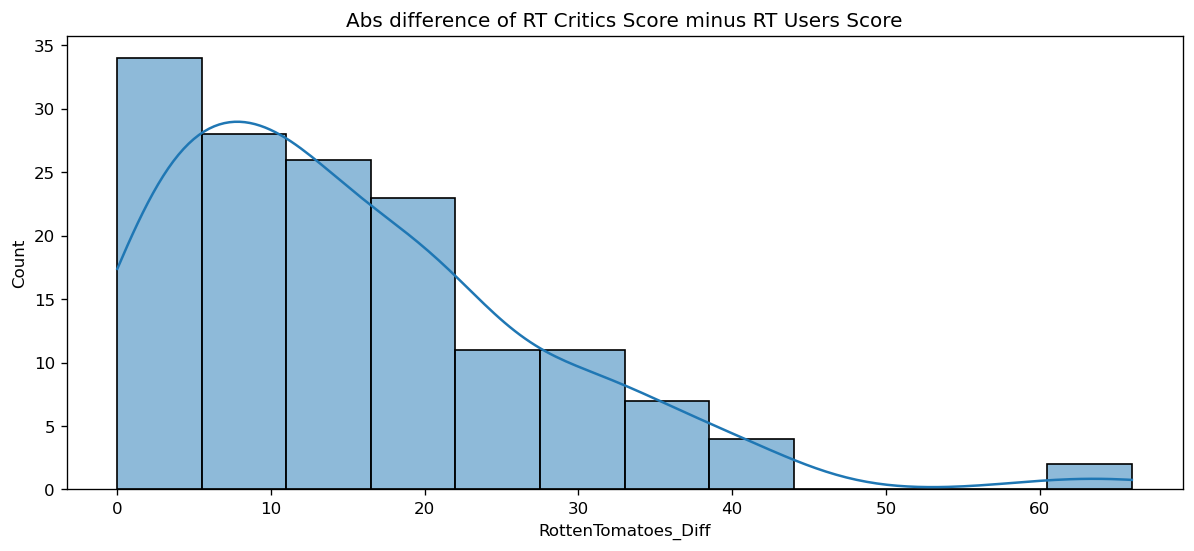

In [72]:
plt.figure(figsize = (12,5), dpi = 120)
sns.histplot(x = all_ratings['RottenTomatoes_Diff'].apply(abs), kde = True)
plt.title('Abs difference of RT Critics Score minus RT Users Score')

Top 5 Movies which users love but critics hate


In [73]:
all_ratings.nsmallest(5, 'RottenTomatoes_Diff')[['FILM', 'RottenTomatoes_Diff']]

,FILM,RottenTomatoes_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Top 5 movies which critics love but users hate

In [74]:
all_ratings.nlargest(5, 'RottenTomatoes_Diff')[['FILM', 'RottenTomatoes_Diff']]

,FILM,RottenTomatoes_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


# NOW DONE WITH ROTTEN TOMATOES AND STARTING WITH METACRITIC

In [75]:
all_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Metacritic User vs Metacritic Ratings on Scatterplot

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

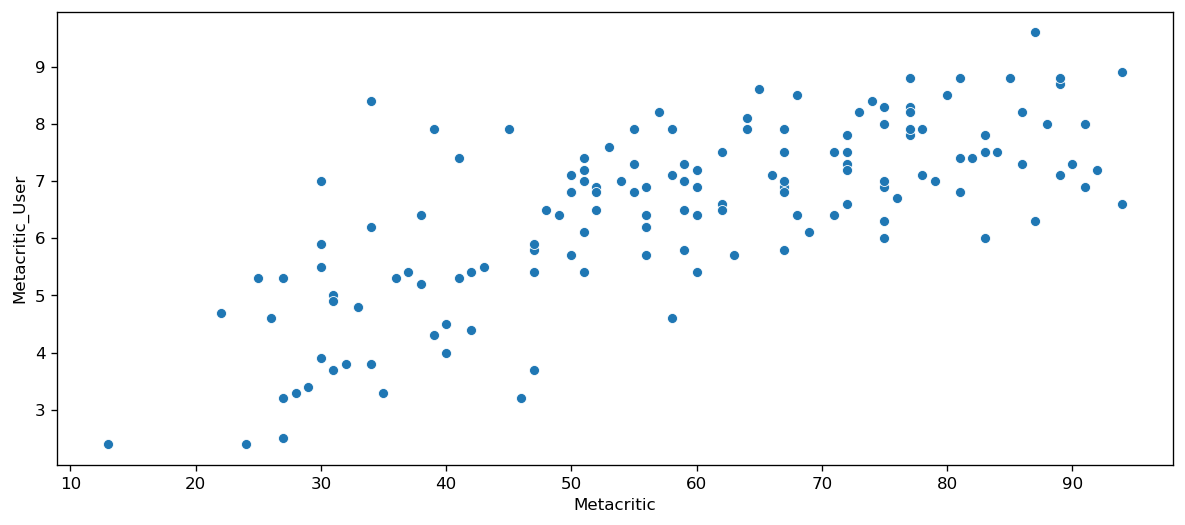

In [79]:
plt.figure(figsize = (12,5), dpi = 120)
sns.scatterplot(data = all_ratings, x = 'Metacritic',  y = 'Metacritic_User')

So, now finally we will analyze the user reviews for Metacritic vs Imdb

In [80]:
all_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

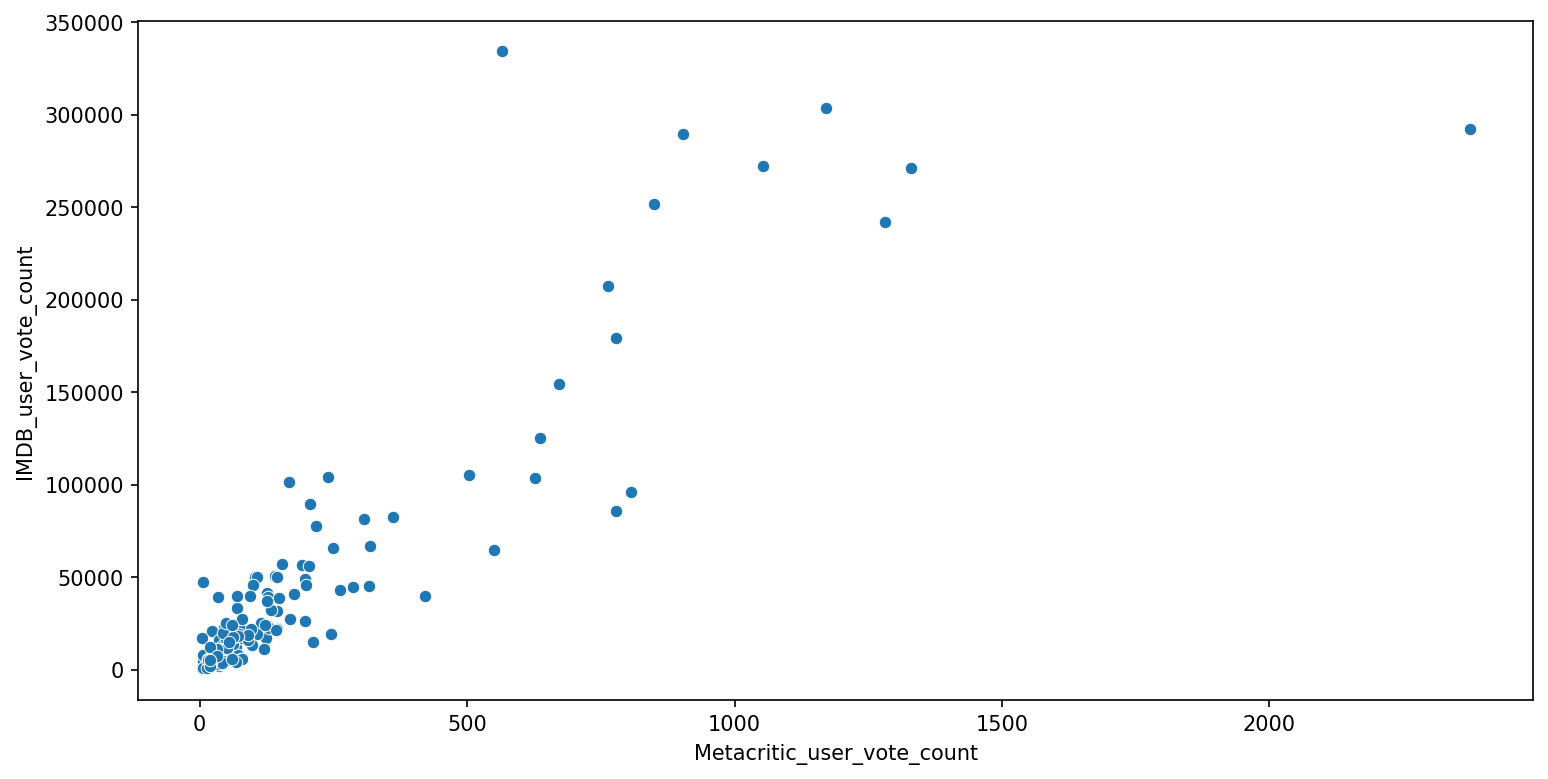

In [82]:
plt.figure(figsize = (12,6), dpi = 150)
sns.scatterplot(data = all_ratings, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

Highest IMDB Movie vote count

In [85]:
all_ratings.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [86]:
all_ratings.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Finally let's compare Fandango vs All Sites

By comparing this and analysing, we can check if Fandango artificially displays the ratings higher than average ratings


In [87]:
df = pd.merge(fandango, all_ratings, on = 'FILM', how = 'inner')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenTomatoes_Diff         145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [89]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [92]:
df['RTnorm'] = np.round(df['RottenTomatoes']/20,1)
df['RTUnorm'] = np.round(df['RottenTomatoes_User']/20,1)

In [93]:
df['Metnorm'] = np.round(df['Metacritic']/20,1)
df['MetUnorm'] = np.round(df['Metacritic_User']/2,1)

In [94]:
df['IMDBnorm'] = np.round(df['IMDB']/2,1)

In [95]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff,RTnorm,RTUnorm,Metnorm,MetUnorm,IMDBnorm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [97]:
norm_scores = df[['STARS', 'RATING', 'RTnorm', 'RTUnorm', 'Metnorm', 'MetUnorm', 'IMDBnorm']]

In [98]:
norm_scores.head()

,STARS,RATING,RTnorm,RTUnorm,Metnorm,MetUnorm,IMDBnorm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


# This is to show the distribution in ratings and if Fandango shows higher average ratings or not


In [105]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


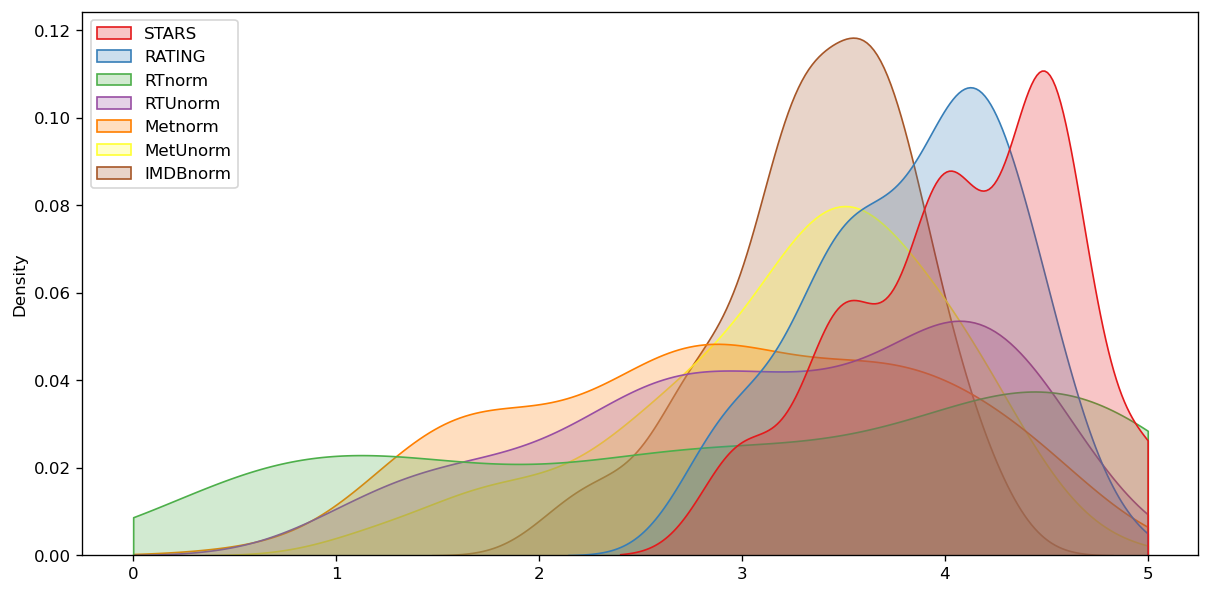

In [110]:
fig,ax = plt.subplots(figsize = (12,6), dpi = 120)
sns.kdeplot(data = norm_scores, clip = [0,5], shade = True, palette = 'Set1', ax=ax)

move_legend(ax, 'upper left')



# As we can see RT Critics ratings have uniform rating system

**We will compare it with Fandango's STAR Rating

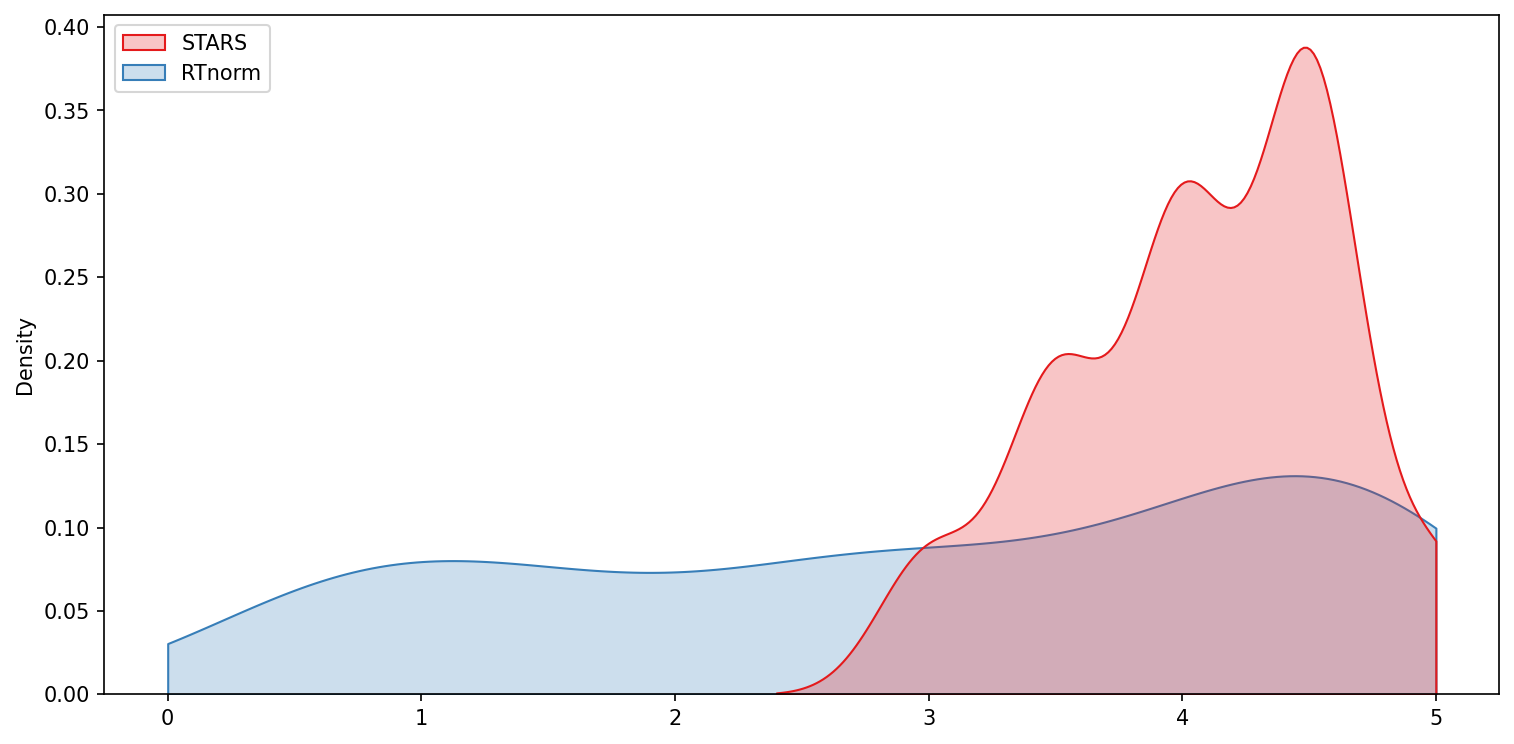

In [116]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 150)

sns.kdeplot(data = norm_scores[['STARS', 'RTnorm']], clip = [0,5], shade = True, palette = 'Set1', ax = ax)

move_legend(ax, 'upper left')


<AxesSubplot:ylabel='Count'>

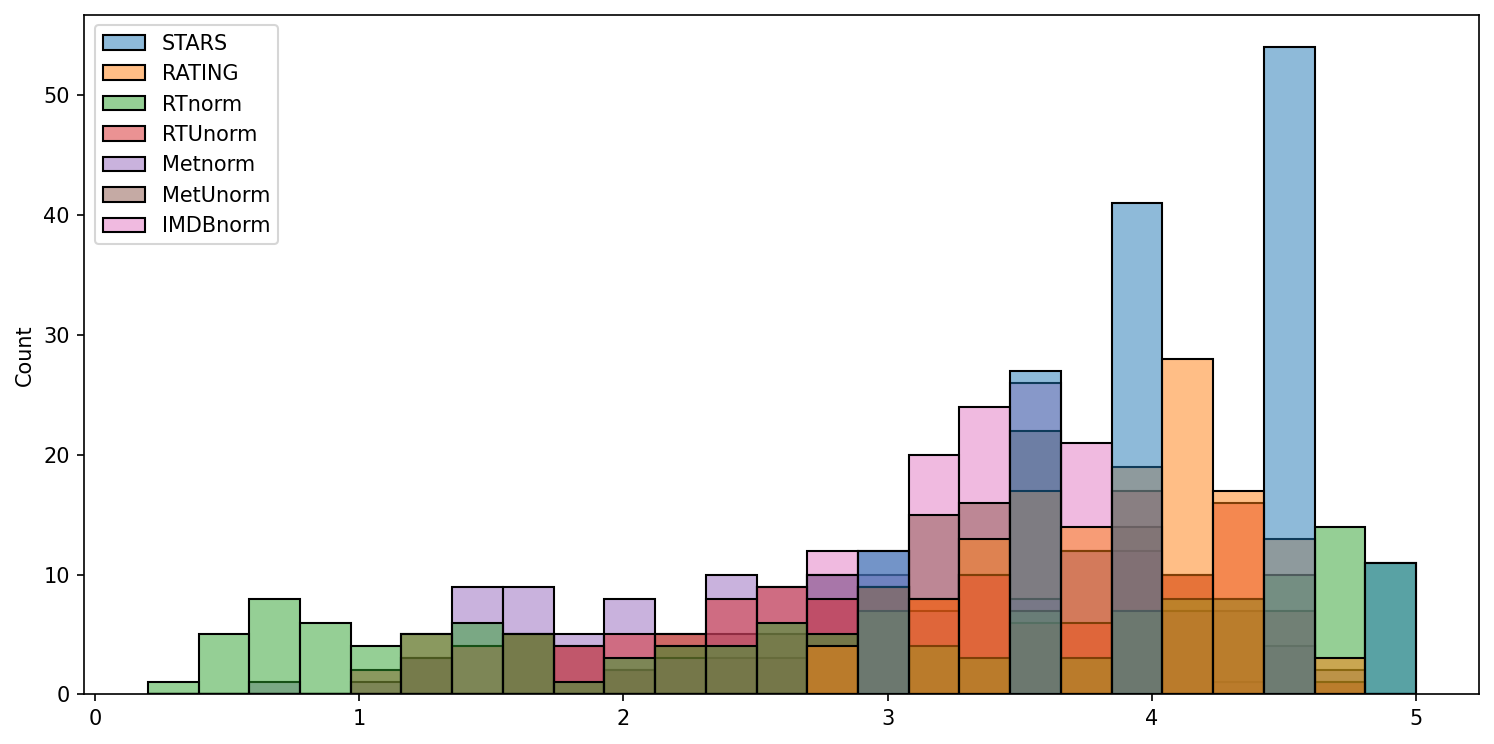

In [118]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 150)

sns.histplot(data = norm_scores, bins = 25)

## A Clustermap to show all the worst rated movies

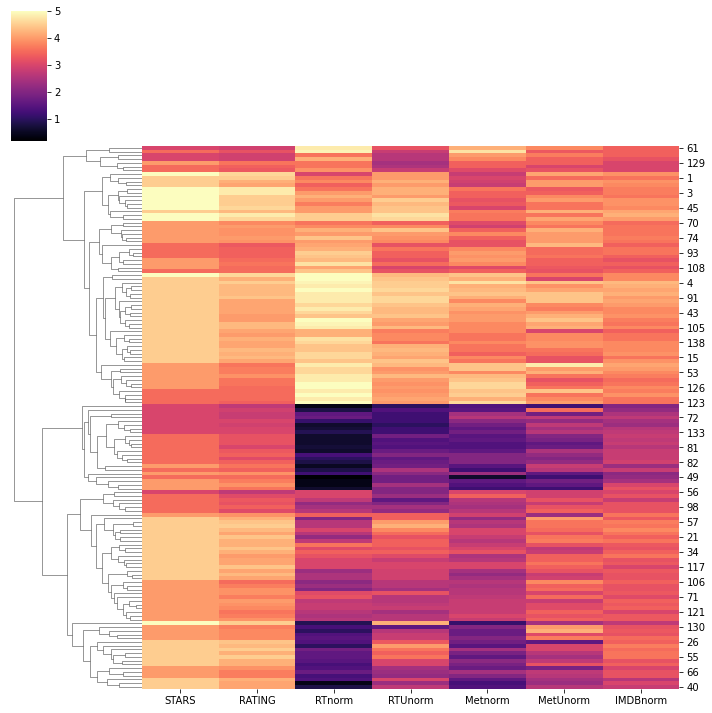

In [125]:
sns.clustermap(data = norm_scores, cmap = 'magma' ,col_cluster = False)

## It is clear that Fandango does show higher ratings than usual rating sites

Now, top 10 worst movies based on RT critics rating

In [129]:
norm_films = df[['STARS', 'RATING', 'RTnorm', 'RTUnorm', 'Metnorm', 'MetUnorm', 'IMDBnorm', 'FILM']]

In [130]:
norm_films.head()

,STARS,RATING,RTnorm,RTUnorm,Metnorm,MetUnorm,IMDBnorm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [131]:
norm_films.nsmallest(10, 'RTnorm')

,STARS,RATING,RTnorm,RTUnorm,Metnorm,MetUnorm,IMDBnorm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


## Finally, showing specific distribution of these top 10 worst movies

<AxesSubplot:ylabel='Density'>

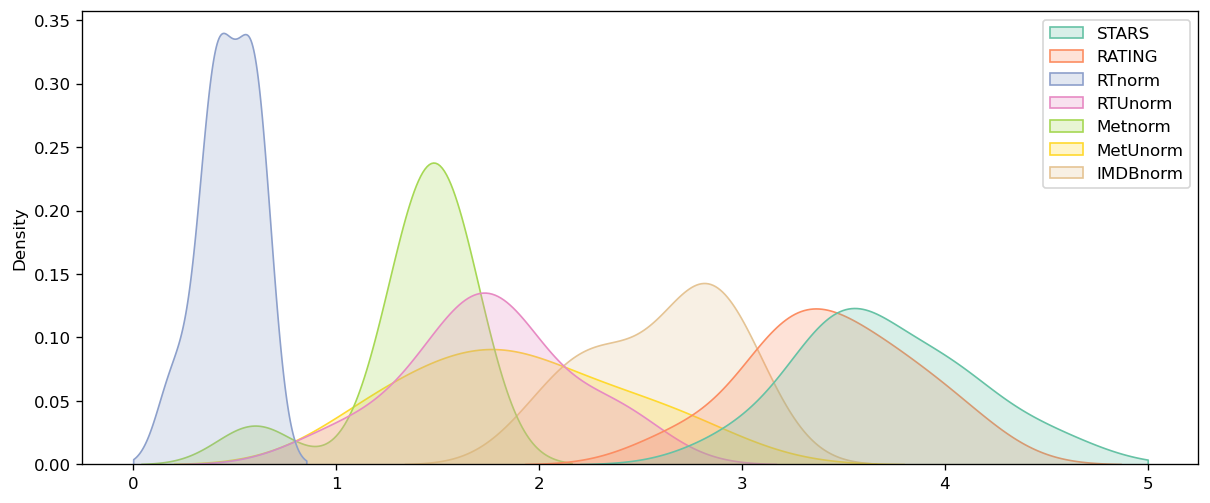

In [133]:
plt.figure(figsize = (12,5), dpi = 120)
sns.kdeplot(data = norm_films.nsmallest(10, 'RTnorm'), clip = [0,5], shade = True, palette = 'Set2')


## Another final example we can randomly show is:

In [134]:
norm_films.iloc[25]

STARS                  4.5
RATING                 4.1
RTnorm                 0.4
RTUnorm                2.3
Metnorm                1.3
MetUnorm               2.3
IMDBnorm               3.0
FILM        Taken 3 (2015)
Name: 25, dtype: object

## Just by seeing this and other visualisations, we can come to the conclusion that Fandango does indeed show artificial ratings